In [1]:
#수집된 무선청소기 데이터의 모델별 흡입력, 사용시간, 가격을 비교 분석해 보자

### 데이터 살펴보기

In [2]:
import pandas as pd
danawa_data = pd.read_excel('C:/Users/name_/Desktop/데이터분석/files/6장/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,146130,60.0,220
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,993520,120.0,200
2,핸디/스틱청소기,다이슨,V8 플러피,427650,40.0,155
3,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,386140,40.0,150
4,핸디/스틱청소기,삼성전자,제트 VS20T9258SDCS,849000,120.0,200


In [3]:
#흡입력이 높은 순서대로 정렬
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
143,핸디/스틱청소기,마끼다,CL100DZ,30690,12.0,330
142,핸디/스틱청소기,리하스,LH20,283760,120.0,330
221,핸디/스틱청소기,퍼피유,T12R,374220,60.0,290
152,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290
52,핸디/스틱청소기,샤오미,드리미 V12,333600,90.0,270


In [4]:
#사용시간이 많은 순서대로 정렬
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
119,핸디/스틱청소기,유니맥스,UVC-1688,17030,300.0,140
155,핸디/스틱청소기,삼성전자,제트 VS20R9078S2CS,811000,120.0,200
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,993520,120.0,200
237,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,723950,120.0,200
28,핸디/스틱청소기,삼성전자,제트 VS20T9259SECS,907730,120.0,200


In [5]:
#흡입력, 사용시간을 기준으로 정렬
top_list = danawa_data.sort_values(['사용시간','흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
119,핸디/스틱청소기,유니맥스,UVC-1688,17030,300.0,140
142,핸디/스틱청소기,리하스,LH20,283760,120.0,330
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,993520,120.0,200
4,핸디/스틱청소기,삼성전자,제트 VS20T9258SDCS,849000,120.0,200
9,핸디/스틱청소기,LG전자,코드제로 A9S A9570,928710,120.0,200


In [6]:
#sort_values() 함수에 두개의 칼럼을 설정하면, 첫번째 칼럼에 우선순위를 둬서 정렬된 후, 다음 칼럼을 기준으로 차례대로 정렬

### 가성비 좋은 제품 알아보기

In [7]:
#가성비가 좋다는 것은 가격 대비 성능이 우수하다는 뜻
#각 모델을 가격, 흡입력, 사용시간의 평균값과 비교해보자

In [8]:
#평균값 정리
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print(price_mean_value, suction_mean_value, use_time_mean_value)

379385.65594855306 157.61414790996784 49.60655737704918


In [12]:
#가성비 좋은 제품 탐색
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data.head()

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,146130,60.0,220
12,핸디/스틱청소기,샤오미,드리미 V11,242750,90.0,250
25,핸디/스틱청소기,샤오미,SHUNZAO Z11,159000,60.0,260
32,핸디/스틱청소기,일렉트로룩스,WELL Q7 WQ71-2OIB,252170,50.0,200
34,핸디/스틱청소기,샤오미,드리미 V9,286080,60.0,200


### 데이터 시각화

In [14]:
#라이브러리 임포트
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [15]:
#한글 글꼴 설정
if platform.system() == 'Windows':
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
else:
    print('Check your OS system')

%matplotlib inline

In [17]:
#결측값 없애기
chart_data = danawa_data.dropna(axis=0)
len(chart_data)

305

In [18]:
#정확한 차트를 그리기 위해서 가격, 사용시간, 흡입력 값이 없는 것은 삭제하도록 dropna함수를 사용
#데이터 행을 지워야하기 때문에 옵션을 axis=0으로 설정

In [19]:
#흡입력, 사용시간의 최댓값/평균값 정리
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

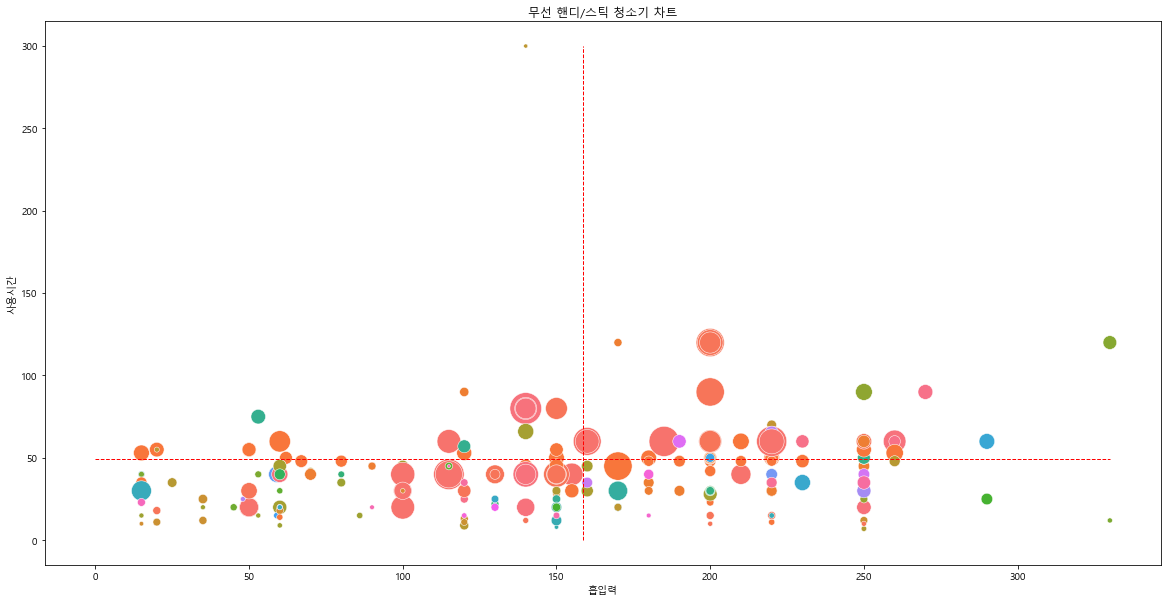

In [21]:
#청소기 성능 시각화
plt.figure(figsize = (20,10))
plt.title('무선 핸디/스틱 청소기 차트')
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue=chart_data['회사명'],
               data=chart_data, sizes=(10,1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--',lw=1) #사용시간 평균선
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value],
        'r--',lw=1) #흡입력 평균선
plt.show()

### 인기제품의 데이터 시각화

In [23]:
#인기제품 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

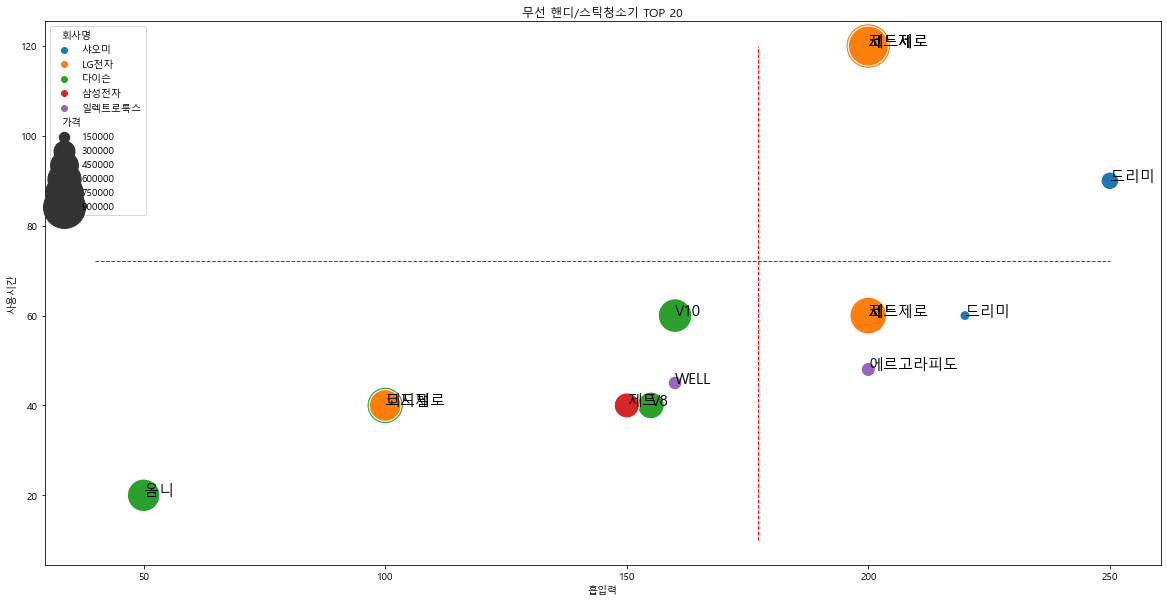

In [34]:
#1.흠입력,사용시간의 최댓값, 평균값 구하기
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

#2.그래프 그리기
plt.figure(figsize = (20,10))
plt.title('무선 핸디/스틱청소기 TOP 20')
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue=chart_data_selected['회사명'],
           data = chart_data_selected, sizes=(100,2000), legend=True)
plt.plot([40,suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [10, use_time_max_value],
        'r--', lw=1)

for index, row in chart_data_selected.iterrows(): #iterrows : 첫번째 변수idx 에 인덱스를 받고, row의 행에 하나씩 접근하여 출력
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품명'].split(' ')[0]
    plt.text(x,y,s,size=15)
    
plt.show()